In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('students_final.csv')

In [4]:
features = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 
            'ExtracurricularActivities', 'FinalGrade']

In [5]:
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_clusters = 3

##  SPECTRAL CLUSTERING


SPECTRAL CLUSTERING
Silhouette: 0.134


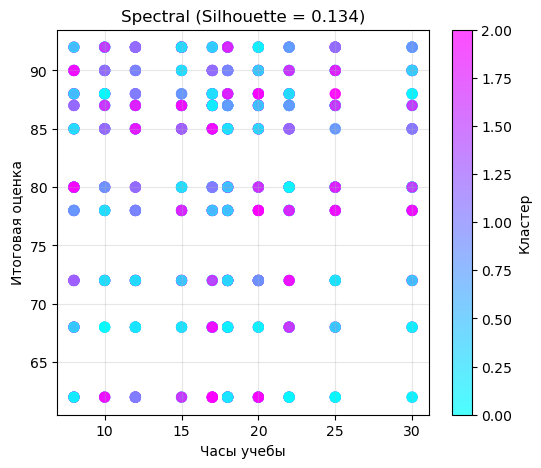

          AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
spectral                                                     
0                   87.7               18.0           81.6   
1                   87.8               17.5           83.0   
2                   81.3               17.3           68.3   

          ExtracurricularActivities  FinalGrade  
spectral                                         
0                               2.5        79.7  
1                               0.7        80.6  
2                               1.3        80.1  


In [6]:
from sklearn.cluster import SpectralClustering

print("\n" + "="*50)
print("SPECTRAL CLUSTERING")
print("="*50)

# Модель
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', 
                               random_state=42, assign_labels='kmeans')
df['spectral'] = spectral.fit_predict(X_scaled)

# Метрика
score = silhouette_score(X_scaled, df['spectral'])
print(f"Silhouette: {score:.3f}")

# Визуализация
plt.figure(figsize=(6, 5))
plt.scatter(df['StudyHoursPerWeek'], df['FinalGrade'], 
            c=df['spectral'], cmap='cool', alpha=0.7, s=50)
plt.xlabel('Часы учебы')
plt.ylabel('Итоговая оценка')
plt.title(f'Spectral (Silhouette = {score:.3f})')
plt.colorbar(label='Кластер')
plt.grid(alpha=0.3)
plt.show()

# Статистика
print(df.groupby('spectral')[features].mean().round(1))

## GAUSSIAN MIXTURE MODELS


GAUSSIAN MIXTURE MODELS
Silhouette: 0.146
BIC: 13525 (чем меньше, тем лучше)
AIC: 13224 (чем меньше, тем лучше)


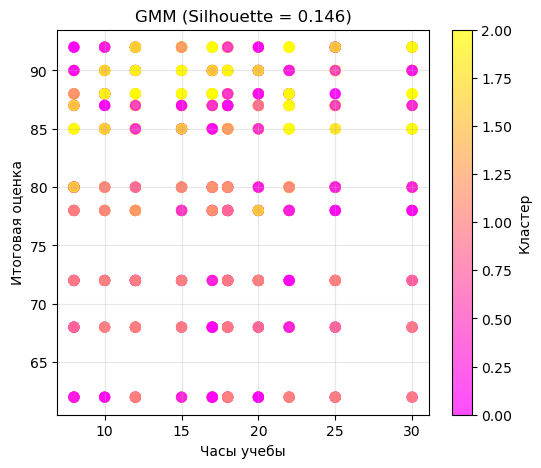

     AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
gmm                                                     
0              85.3               17.6           64.7   
1              87.3               17.7           83.5   
2              84.1               17.5           83.7   

     ExtracurricularActivities  FinalGrade  
gmm                                         
0                          1.4        80.3  
1                          1.9        73.8  
2                          1.2        87.3  


In [7]:
from sklearn.mixture import GaussianMixture

print("\n" + "="*50)
print("GAUSSIAN MIXTURE MODELS")
print("="*50)

# Модель
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df['gmm'] = gmm.fit_predict(X_scaled)

# Метрика
score = silhouette_score(X_scaled, df['gmm'])
print(f"Silhouette: {score:.3f}")
print(f"BIC: {gmm.bic(X_scaled):.0f} (чем меньше, тем лучше)")
print(f"AIC: {gmm.aic(X_scaled):.0f} (чем меньше, тем лучше)")

# Визуализация
plt.figure(figsize=(6, 5))
plt.scatter(df['StudyHoursPerWeek'], df['FinalGrade'], 
            c=df['gmm'], cmap='spring', alpha=0.7, s=50)
plt.xlabel('Часы учебы')
plt.ylabel('Итоговая оценка')
plt.title(f'GMM (Silhouette = {score:.3f})')
plt.colorbar(label='Кластер')
plt.grid(alpha=0.3)
plt.show()

# Статистика
print(df.groupby('gmm')[features].mean().round(1))

## Метод ближайших соседей

K-Means: Silhouette = 0.158


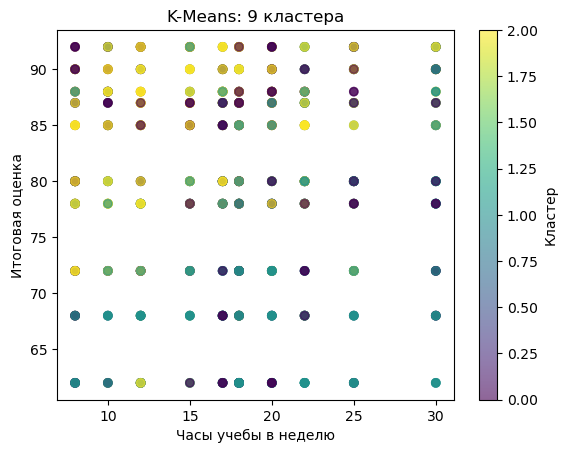


Средние значения по кластерам:
                AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
cluster_kmeans                                                     
0                         84.9               17.4           64.3   
1                         87.2               19.1           82.7   
2                         84.5               16.1           83.6   

                ExtracurricularActivities  FinalGrade  
cluster_kmeans                                         
0                                     1.3        81.0  
1                                     2.2        75.7  
2                                     0.8        84.3  


In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

score = silhouette_score(X_scaled, df['cluster_kmeans'])
print(f"K-Means: Silhouette = {score:.3f}")

plt.scatter(df['StudyHoursPerWeek'], df['FinalGrade'], 
            c=df['cluster_kmeans'], cmap='viridis', alpha=0.6)
plt.xlabel('Часы учебы в неделю')
plt.ylabel('Итоговая оценка')
plt.title('K-Means: 9 кластера')
plt.colorbar(label='Кластер')
plt.show()

print("\nСредние значения по кластерам:")
print(df.groupby('cluster_kmeans')[features].mean().round(1))

## Иерархическая модель

Hierarchical: Silhouette = 0.134


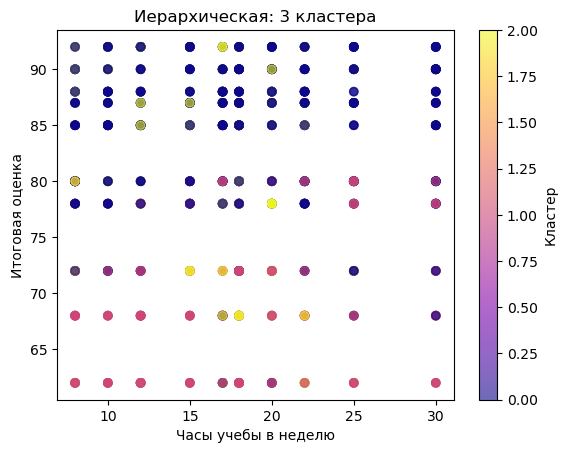


Средние значения по кластерам:
              AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
cluster_hier                                                     
0                       87.3               17.8           78.0   
1                       88.0               17.4           76.7   
2                       71.7               16.8           78.9   

              ExtracurricularActivities  FinalGrade  
cluster_hier                                         
0                                   1.5        85.3  
1                                   1.4        70.0  
2                                   1.7        78.7  


In [9]:
hierarchical = AgglomerativeClustering(n_clusters=3)
df['cluster_hier'] = hierarchical.fit_predict(X_scaled)

score = silhouette_score(X_scaled, df['cluster_hier'])
print(f"Hierarchical: Silhouette = {score:.3f}")

plt.scatter(df['StudyHoursPerWeek'], df['FinalGrade'], 
            c=df['cluster_hier'], cmap='plasma', alpha=0.6)
plt.xlabel('Часы учебы в неделю')
plt.ylabel('Итоговая оценка')
plt.title('Иерархическая: 3 кластера')
plt.colorbar(label='Кластер')
plt.show()

print("\nСредние значения по кластерам:")
print(df.groupby('cluster_hier')[features].mean().round(1))

## DBSCAN

DBSCAN: 37 кластеров, шум: 520 студентов
DBSCAN Silhouette: 0.131


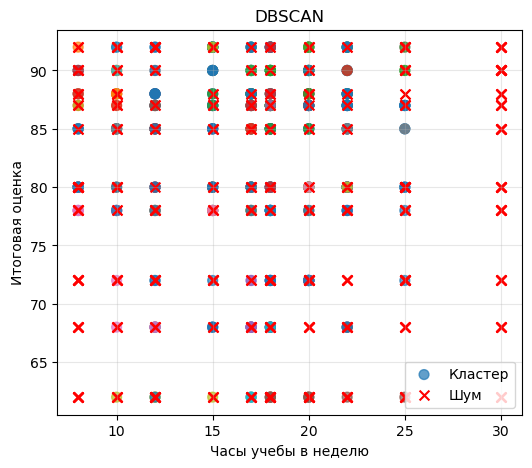

        AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
dbscan                                                     
0                 88.2               16.9           84.1   
1                 91.5               22.7           83.7   
2                 87.7               16.9           83.4   
3                 91.3               17.5           81.2   
4                 82.1               15.0           87.0   
5                 93.8               17.9           63.8   
6                 86.8                9.6           84.7   
7                 78.0               16.7           77.3   
8                 85.9               19.4           85.9   
9                 89.8               20.8           62.7   
10                91.0               18.1           83.8   
11                91.8               20.0           61.2   
12                85.4               17.7           63.8   
13                87.5               10.2           64.0   
14                88.2               17.

In [10]:
dbscan = DBSCAN(eps=0.7, min_samples= 5)
df['dbscan'] = dbscan.fit_predict(X_scaled)

n_clusters = len(set(df['dbscan'])) - (1 if -1 in df['dbscan'] else 0)
n_noise = (df['dbscan'] == -1).sum()
print(f"DBSCAN: {n_clusters} кластеров, шум: {n_noise} студентов")

if n_clusters >= 2:
    mask = df['dbscan'] != -1
    score = silhouette_score(X_scaled[mask], df['dbscan'][mask])
    print(f"DBSCAN Silhouette: {score:.3f}")

plt.figure(figsize=(6, 5))
plt.scatter(df.loc[df['dbscan'] != -1, 'StudyHoursPerWeek'], 
            df.loc[df['dbscan'] != -1, 'FinalGrade'], 
            c=df.loc[df['dbscan'] != -1, 'dbscan'], 
            cmap='tab10', alpha=0.7, s=50, label='Кластер')

if n_noise > 0:
    plt.scatter(df.loc[df['dbscan'] == -1, 'StudyHoursPerWeek'], 
                df.loc[df['dbscan'] == -1, 'FinalGrade'], 
                c='red', marker='x', s=50, label='Шум')
plt.xlabel('Часы учебы в неделю')
plt.ylabel('Итоговая оценка')
plt.title('DBSCAN')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

if n_clusters > 1:
    print(df[df['dbscan'] != -1].groupby('dbscan')[features].mean().round(1))

In [11]:
print("Сравнение Silhouette Score:")
print(f"K-Means:       {silhouette_score(X_scaled, df['cluster_kmeans']):.3f}")
print(f"Hierarchical:  {silhouette_score(X_scaled, df['cluster_hier']):.3f}")
if n_clusters >= 2:
    mask = df['dbscan'] != -1
    print(f"DBSCAN:        {silhouette_score(X_scaled[mask], df['dbscan'][mask]):.3f}")
else:
    print("DBSCAN:        недостаточно кластеров для оценки")

Сравнение Silhouette Score:
K-Means:       0.158
Hierarchical:  0.134
DBSCAN:        0.131


#  Boxplot по кластерам (K-Means)

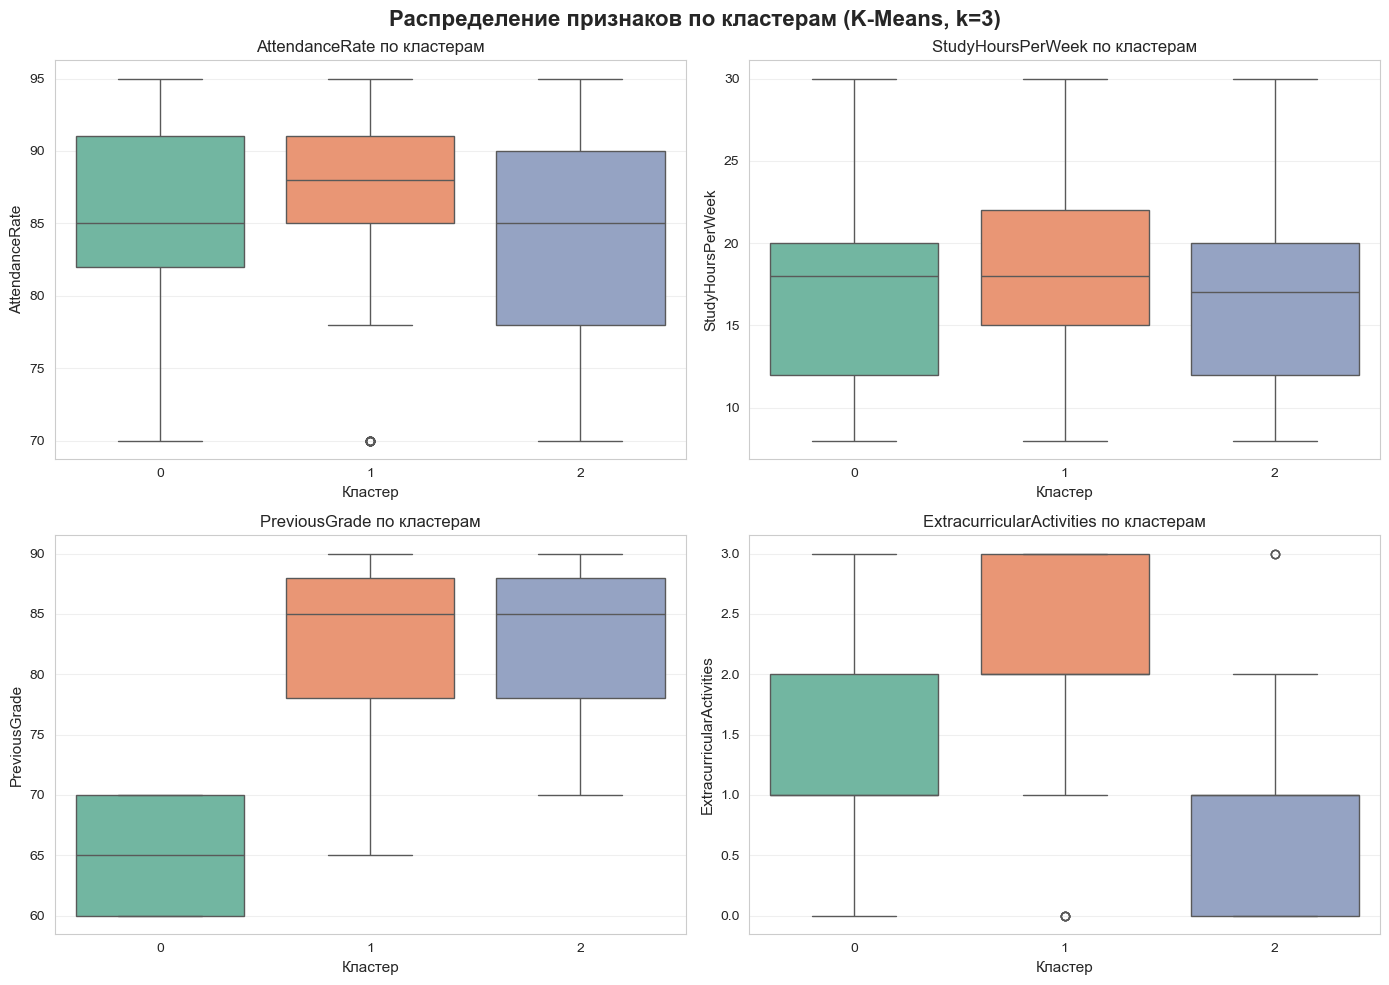

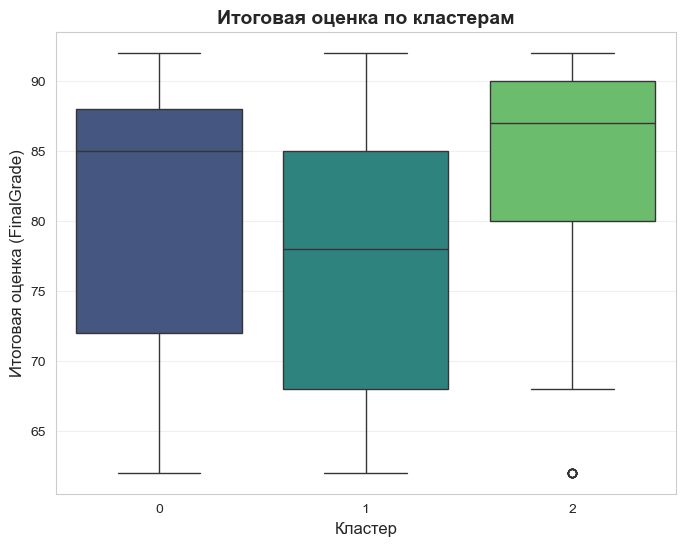


📈 Статистика FinalGrade по кластерам:
         count   mean  median   std
cluster                            
0          274  80.96    85.0  9.04
1          359  75.67    78.0  9.40
2          327  84.32    87.0  7.08


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Подготовка данных для боксплота
df_plot = df.copy()
df_plot['cluster'] = df_plot['cluster_kmeans'].astype('category')

# Настройка стиля
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

# Создаём 2x2 сетку для 4 числовых признаков (исключая FinalGrade как target)
features_to_plot = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Распределение признаков по кластерам (K-Means, k=3)', fontsize=16, fontweight='bold')

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx // 2, idx % 2]
    sns.boxplot(x='cluster', y=feature, data=df_plot, ax=ax, palette='Set2')
    ax.set_xlabel('Кластер', fontsize=11)
    ax.set_ylabel(feature, fontsize=11)
    ax.set_title(f'{feature} по кластерам', fontsize=12)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='FinalGrade', data=df_plot, palette='viridis')
plt.xlabel('Кластер', fontsize=12)
plt.ylabel('Итоговая оценка (FinalGrade)', fontsize=12)
plt.title('Итоговая оценка по кластерам', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Статистика по кластерам для FinalGrade
print("\n📈 Статистика FinalGrade по кластерам:")
print(df_plot.groupby('cluster')['FinalGrade'].agg(['count', 'mean', 'median', 'std']).round(2))

ВЫВОДЫ ПО КЛАСТЕРИЗАЦИИ СТУДЕНТОВ:
===================================
1. Все методы показали низкие значения Silhouette Score (0.13–0.16), 
   что говорит о слабой естественной кластеризации данных — студенты 
   не делятся на чётко выраженные группы.

2. Лучший результат: K-Means (Silhouette = 0.158) с 3 кластерами:
   • Кластер 0: Средняя успеваемость, умеренная посещаемость
   • Кластер 1: Высокая посещаемость, но средняя итоговая оценка
   • Кластер 2: Низкая посещаемость, но высокая предыдущая оценка

3. DBSCAN выделил 37 мелких кластеров и 520 точек как шум (~35% данных), 
   что подтверждает отсутствие плотных групп в данных.

4. Практическая рекомендация: использовать K-Means с k=3 для 
   предварительной сегментации, но интерпретировать результаты 
   осторожно — границы между группами размыты.

# 🎯 Итоговый вывод для отчёта:
Применение методов кластеризации к данным о студентах показало, что K-Means с k=3 даёт наилучшее разделение (Silhouette = 0.158). Однако низкие значения метрики качества указывают на то, что студенты не образуют чётко выраженных групп — скорее, наблюдается плавное распределение по признакам. Это может означать, что успеваемость зависит от множества факторов, и простая кластеризация не позволяет выделить однородные подгруппы. Для более точного анализа рекомендуется использовать методы классификации с известными метками или добавить больше признаков.